#git

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
cd /content/drive/MyDrive/Deep Learning/final_project/20242R0136COSE47402

/content/drive/MyDrive/Deep Learning/final_project/20242R0136COSE47402


In [17]:
!git config --global user.email 'robosun78@korea.ac.kr'
!git config --global user.name 'robosun78'

In [18]:
!git add final_project

fatal: pathspec 'final_project' did not match any files


In [ ]:
!git commit -m 'HW4'
!git push

[main 5c4dcec] HW4
 1 file changed, 6111 insertions(+)
 create mode 100644 HW4/Homework_4.ipynb
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 44.98 KiB | 1.05 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/robosun78/20242R0136COSE47402.git
   d794aa5..5c4dcec  main -> main


#Code

In [4]:
import torch
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
import cv2
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize

In [3]:
!pip install transformers==4.45.0

##CLIP

In [5]:
clip_processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
clip_model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
prompts = ["cutlery", "pancakes", "blueberries", "orange juice"]

In [7]:
from PIL import Image
import requests
from io import BytesIO

url = "https://images.unsplash.com/photo-1506084868230-bb9d95c24759?q=80&w=2787&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
response = requests.get(url)
image = Image.open(BytesIO(response.content))

image

Output hidden; open in https://colab.research.google.com to view.

In [53]:
image.size

(2787, 4181)

In [55]:
image.size

(224, 224)

In [8]:
from PIL import Image
import torch

# Ensure image is resized and in the correct format
image = image.resize((224, 224))
image = image.convert("RGB")

# Process inputs
inputs = clip_processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

# Predict
with torch.no_grad():
    outputs = clip_model(**inputs)

# Extract predictions
preds = outputs.logits.unsqueeze(1)

/usr/local/lib/python3.10/dist-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


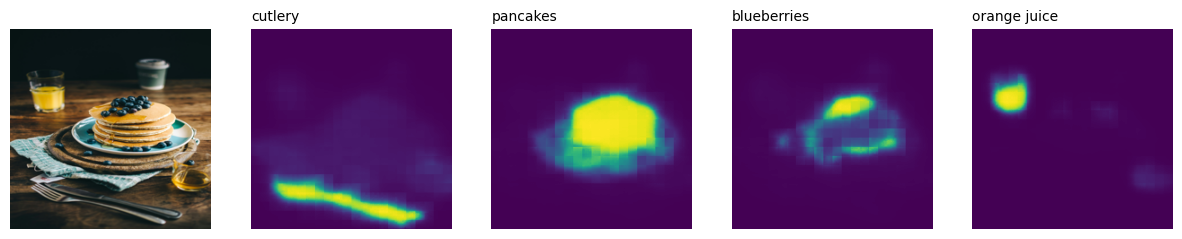

In [9]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, len(prompts) + 1, figsize=(3*(len(prompts) + 1), 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(len(prompts))];
[ax[i+1].text(0, -15, prompt) for i, prompt in enumerate(prompts)];


In [14]:
preds[0][0]

tensor([[-9.0374, -9.0090, -9.0810,  ..., -8.6950, -8.6736, -8.6607],
        [-8.8543, -8.6009, -8.7483,  ..., -8.5617, -8.5957, -8.5335],
        [-8.3980, -8.2383, -8.4742,  ..., -8.2421, -8.3056, -8.3002],
        ...,
        [-6.9884, -6.9039, -6.8696,  ..., -6.1587, -6.2990, -6.3857],
        [-7.2089, -7.1767, -7.0926,  ..., -6.3203, -6.4975, -6.5801],
        [-7.5220, -7.5681, -7.4215,  ..., -6.6880, -6.7209, -6.8569]])

##Colorize Part